#Name : Ayush Vadalia   
#Batch : D1-1
#SAP ID : 60009220096

##**AIM** : Investigate the relationship between major stock market indices and the US Dollar

In [ ]:
import pandas as pd

##Importing the Nifty IT dataset

In [ ]:
df=pd.read_csv('/content/NIFTY IT-01-07-2022-to-01-07-2023.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,01-Jul-22,27718.80,28151.00,27524.30,28064.25,17362585,2460.19
1,04-Jul-22,28084.25,28174.40,27643.65,27890.65,16524407,2554.89
2,05-Jul-22,28020.30,28233.05,27642.60,27695.15,22705381,3158.56
3,06-Jul-22,27778.65,28148.90,27628.55,28007.60,19427285,2706.18
4,07-Jul-22,28217.80,28459.25,28077.05,28196.35,17533750,2507.99


##Columns

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')

##Splitting the column of Dates into Month,Year and Date

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

<ipython-input-67-0dda9b1f1541>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


##Plotting the date vs Turnover graph

The value of turnover has spiked the highest between March 2023 and May 2023

<Axes: xlabel='Date'>

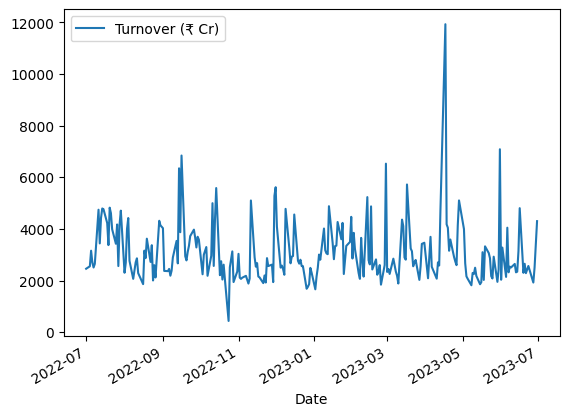

In [ ]:

df.plot(x='Date', y='Turnover (₹ Cr)', kind='line')


In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),Year,Month
0,2022-07-01,27718.80,28151.00,27524.30,28064.25,17362585,2460.19,2022,7
1,2022-07-04,28084.25,28174.40,27643.65,27890.65,16524407,2554.89,2022,7
2,2022-07-05,28020.30,28233.05,27642.60,27695.15,22705381,3158.56,2022,7
3,2022-07-06,27778.65,28148.90,27628.55,28007.60,19427285,2706.18,2022,7
4,2022-07-07,28217.80,28459.25,28077.05,28196.35,17533750,2507.99,2022,7
5,2022-07-08,28450.55,28459.55,28095.35,28250.30,18446136,2649.36,2022,7
6,2022-07-11,27855.75,27941.20,27195.65,27380.55,30951187,4745.70,2022,7
7,2022-07-12,27248.20,27504.40,27022.85,27063.75,22932784,3441.23,2022,7
8,2022-07-13,27228.95,27247.45,26872.75,26949.75,32810008,4427.91,2022,7
9,2022-07-14,27155.00,27162.90,26298.00,26523.30,29820417,4793.39,2022,7


##Splitting the dataset into Training and Testing by first finding the splitting column

In [ ]:
df.sort_values('Date', inplace=True)
train_ratio=0.8
split_index=int(len(df)*train_ratio)
train_data=df[:split_index]
test_data=df[:split_index:]
print(split_index)

197


In [ ]:
features = ['Open','High','Low',	'Close'	,'Shares Traded ']
X_train = train_data[features]
y_train = train_data['Turnover (₹ Cr)']
X_test = test_data[features]
y_test = test_data['Turnover (₹ Cr)']


##Applying Linear Regression on the above dataset

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Predicted Turnover in Crores: {predictions[0]}')

Mean Squared Error: 173422.38800947595
Predicted Turnover in Crores: 2591.6844280271935


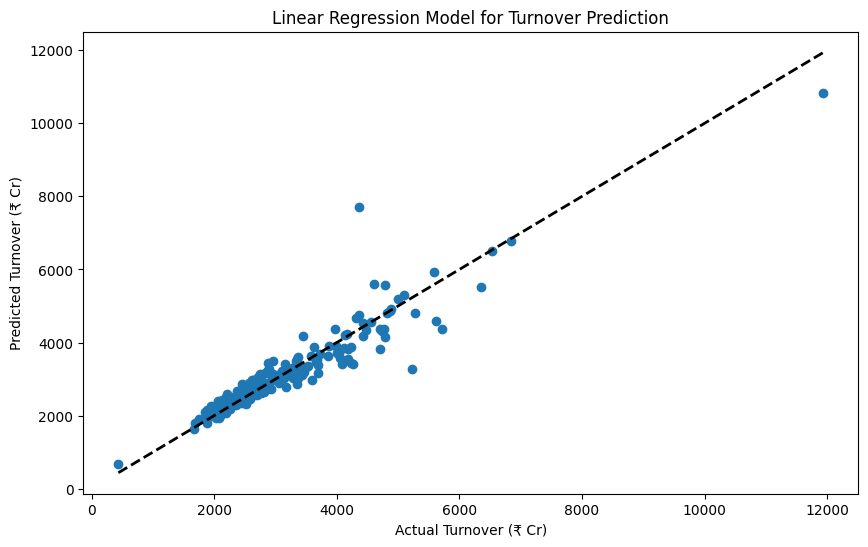

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Turnover (₹ Cr)')
plt.ylabel('Predicted Turnover (₹ Cr)')
plt.title('Linear Regression Model for Turnover Prediction')
plt.show()


##Applying DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor(max_depth =4)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(f'Predicted Turnover in Crores: {y_pred[0]}')

Predicted Turnover in Crores: 2365.5257142857145


##Plotting a decision tree

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six']=six

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO

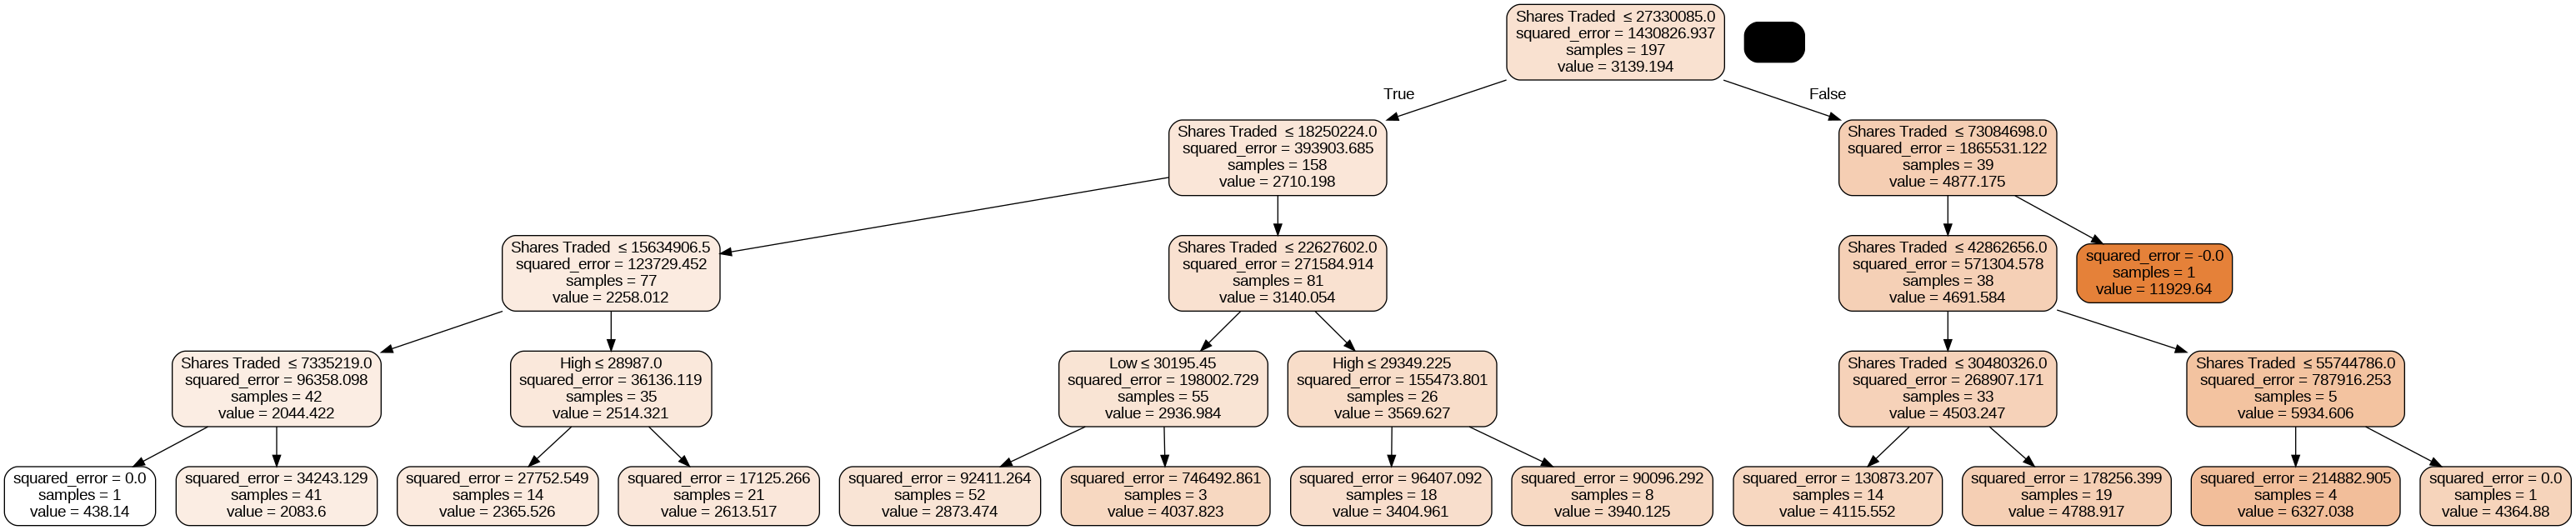

In [ ]:
from IPython.display import Image
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X_train.columns, class_names=df.columns, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

##Applying RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

print(f'Predicted Turnover in Crores: {predictions[0]}')


Mean Squared Error: 52758.59051135158
Predicted Turnover in Crores: 2419.203000000001


##Applying SVR

In [ ]:
from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

mse_svm = mean_squared_error(y_test, svm_predictions)
print(f'SVM Mean Squared Error: {mse_svm}')
svm_prediction = svm_model.predict(X_test)
print(f'SVM Predicted Turnover in Crores: {svm_prediction[0]}')


SVM Mean Squared Error: 1501939.683239952
SVM Predicted Turnover in Crores: 2802.574475994647


##Applying KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, knn_predictions)

print(f'KNN Mean Squared Error: {mse_knn}')

knn_prediction = knn_model.predict(X_test)

print(f'KNN Predicted Turnover in Crores: {knn_prediction[0]}')

KNN Mean Squared Error: 251298.59764897457
KNN Predicted Turnover in Crores: 2530.472


**Conclusion:**

Based on the comparison of various regression models, it can be concluded that the **Random Forest Regressor** and **SVM** performed relatively well in predicting the turnover. Both models achieved comparable mean squared errors, with the Random Forest Regressor having a slightly lower loss. However, it's important to consider other factors such as model complexity and interpretability when choosing the final model.

In [ ]:

features_data = X_test.iloc[0]


predicted_turnover = model.predict([features_data])


print(f'Predicted Turnover for the given date: {predicted_turnover[0]} Crores')

Predicted Turnover for the given date: 2419.203000000001 Crores


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Final Prediction:**

Using the Random Forest Regressor, the predicted turnover for a specific date with given features (Open, High, Low, Close, and Shares Traded) can be obtained as follows: Rs 2419.2030

#Investigating the relationship between stock market and US Dollar

##Graph between predicted and actual values

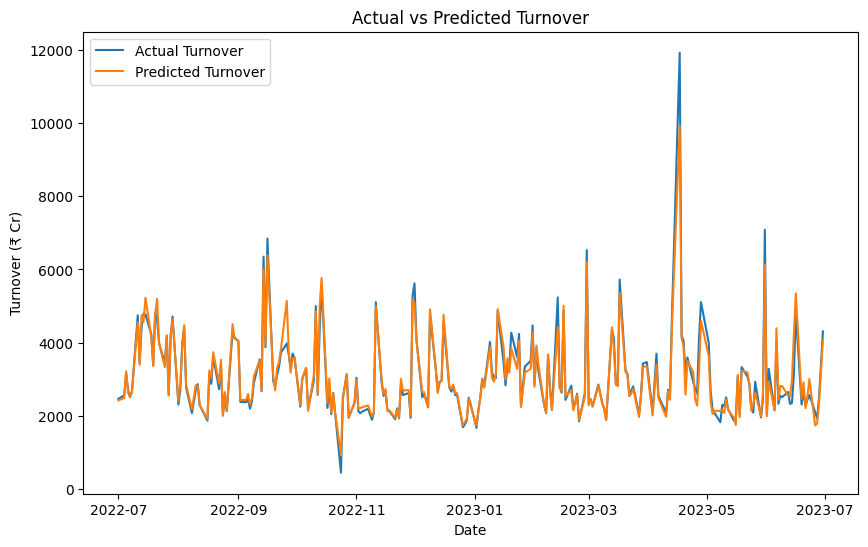

In [ ]:
import matplotlib.pyplot as plt
x = df['Date']
y = df['Turnover (₹ Cr)']
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Actual Turnover')
predicted_y = model.predict(df[features])
plt.plot(x, predicted_y, label='Predicted Turnover')
plt.xlabel('Date')
plt.ylabel('Turnover (₹ Cr)')
plt.title('Actual vs Predicted Turnover')
plt.legend()
plt.show()


##Importing the second dataset that has exchange rates of the months

In [ ]:
df1=pd.read_csv('/content/Target Dataset.csv')
df1.head(15)

,Months1,Year1,Exchange_rate(in Rs)
0,Jul,22,78.08
1,Aug,22,79.60
2,Sep,22,79.56
3,Oct,22,80.23
4,Nov,22,82.34
5,Dec,22,81.83
6,Jan,23,82.46
7,Feb,23,81.90
8,Mar,23,82.61
9,Apr,23,82.28


##To compare the value we take the mean of turnover for each month and store it in an array

In [ ]:
months = df['Month'].unique()
monthly_average_turnover = []

for month in months:
  average_turnover = df[df['Month'] == month]['Turnover (₹ Cr)'].mean()
  monthly_average_turnover.append(average_turnover)

print(monthly_average_turnover)


[3728.6790476190467, 2946.3189999999995, 3459.3336363636363, 2804.247894736842, 2585.598571428571, 2912.877727272727, 3282.9495238095237, 3089.6324999999997, 2958.808095238095, 3812.183529411765, 2672.9404545454545, 2724.3114285714287]


##Monthwise comparison

In [ ]:
for i in range(len(monthly_average_turnover)):
  print(f"Month {i+1}: Average Turnover = {monthly_average_turnover[i]}, Exchange Rate = {df1['Exchange_rate(in Rs)'][i]}")


Month 1: Average Turnover = 3728.6790476190467, Exchange Rate = 78.08
Month 2: Average Turnover = 2946.3189999999995, Exchange Rate = 79.6
Month 3: Average Turnover = 3459.3336363636363, Exchange Rate = 79.56
Month 4: Average Turnover = 2804.247894736842, Exchange Rate = 80.23
Month 5: Average Turnover = 2585.598571428571, Exchange Rate = 82.34
Month 6: Average Turnover = 2912.877727272727, Exchange Rate = 81.83
Month 7: Average Turnover = 3282.9495238095237, Exchange Rate = 82.46
Month 8: Average Turnover = 3089.6324999999997, Exchange Rate = 81.9
Month 9: Average Turnover = 2958.808095238095, Exchange Rate = 82.61
Month 10: Average Turnover = 3812.183529411765, Exchange Rate = 82.28
Month 11: Average Turnover = 2672.9404545454545, Exchange Rate = 82.02
Month 12: Average Turnover = 2724.3114285714287, Exchange Rate = 82.34


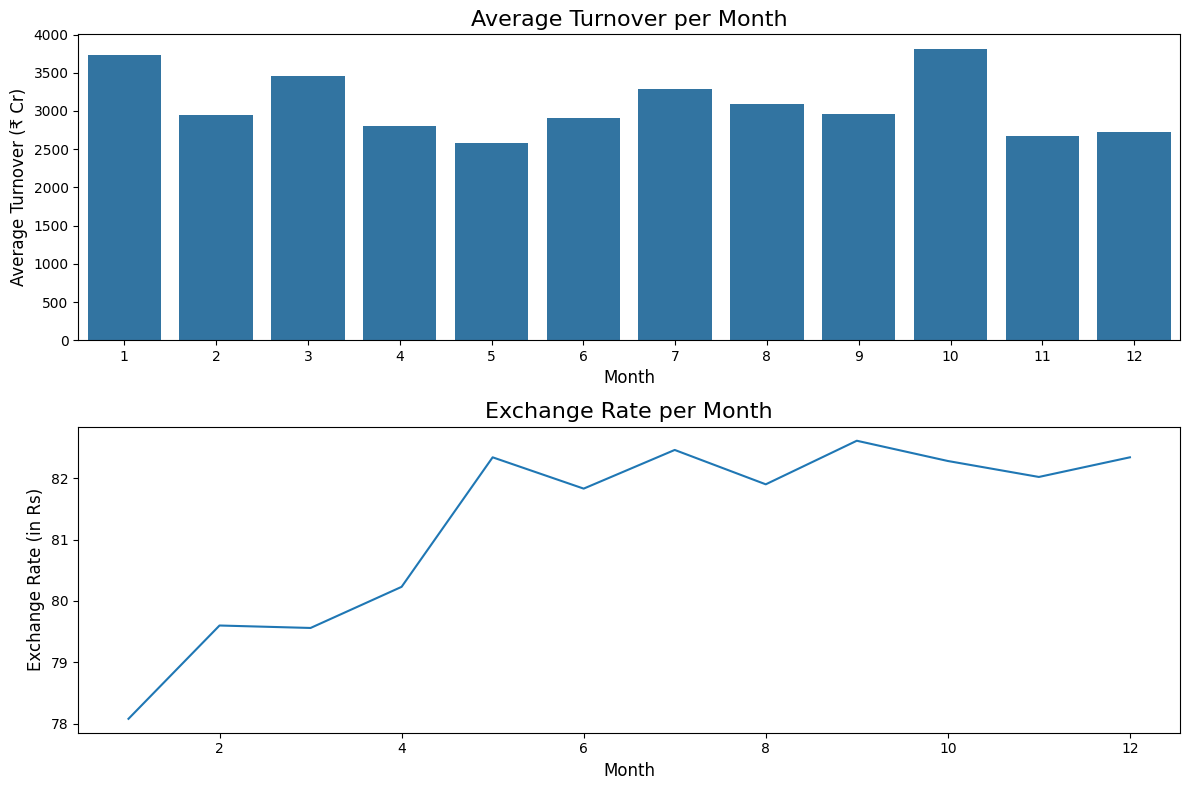

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot the average turnover on the first subplot
sns.barplot(x=range(1, len(monthly_average_turnover) + 1), y=monthly_average_turnover, ax=ax1)
ax1.set_title('Average Turnover per Month', fontsize=16)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Average Turnover (₹ Cr)', fontsize=12)

# Plot the exchange rate on the second subplot
sns.lineplot(x=range(1, len(df1['Exchange_rate(in Rs)']) + 1), y=df1['Exchange_rate(in Rs)'], ax=ax2)
ax2.set_title('Exchange Rate per Month', fontsize=16)
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Exchange Rate (in Rs)', fontsize=12)

# Improve the layout and show the plot
plt.tight_layout()
plt.show()



##A weakening INR against the USD can make Indian stocks cheaper for foreign investors, potentially increasing their participation in the market, thus increasing turnover. Conversely, a strengthening INR could deter foreign investment due to higher relative costs

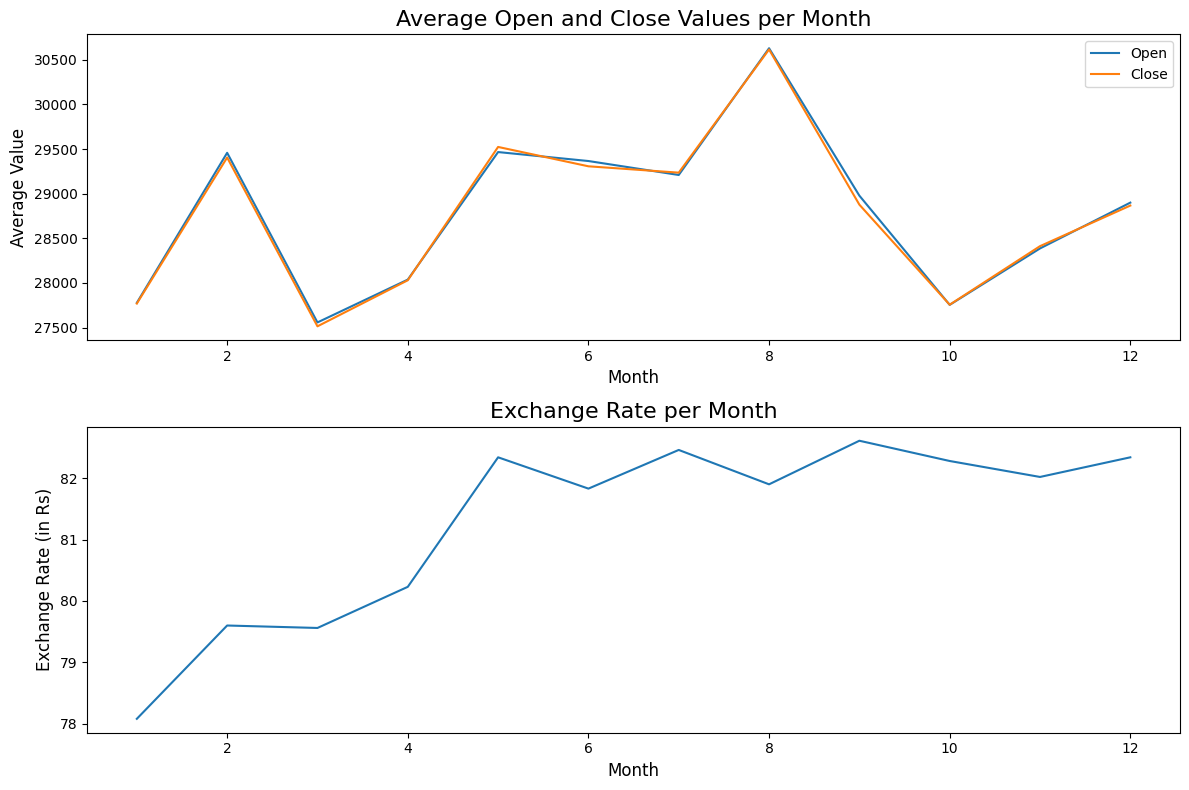

In [ ]:
import matplotlib.pyplot as plt

monthly_average_open = []
monthly_average_close = []


for month in months:
  average_open = df[df['Month'] == month]['Open'].mean()
  monthly_average_open.append(average_open)
  average_close = df[df['Month'] == month]['Close'].mean()
  monthly_average_close.append(average_close)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))


sns.lineplot(x=range(1, len(monthly_average_open) + 1), y=monthly_average_open, label='Open', ax=ax1)
sns.lineplot(x=range(1, len(monthly_average_close) + 1), y=monthly_average_close, label='Close', ax=ax1)
ax1.set_title('Average Open and Close Values per Month', fontsize=16)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Average Value', fontsize=12)


sns.lineplot(x=range(1, len(df1['Exchange_rate(in Rs)']) + 1), y=df1['Exchange_rate(in Rs)'], ax=ax2)
ax2.set_title('Exchange Rate per Month', fontsize=16)
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Exchange Rate (in Rs)', fontsize=12)


plt.tight_layout()
plt.show()


##The relationship between USD/INR exchange rates and Nifty turnover isn't straightforward and is subject to changing economic conditions and investor sentiments. It requires continuous monitoring of a range of economic indicators and market sentiment analysis to understand and predict trends effectively